In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.cluster import KMeans
from time import time

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
path='data/movielens-100k/'
weights = pd.read_csv(path+'movie_weights.csv')
genres = pd.read_csv(path+'movie_genres.csv')

In [6]:
weights.head()

,movie,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,Star Wars (1977),0.450509,0.139392,-0.223595,-0.110323,0.238098,0.315389,-0.187934,-0.272431,0.196451,...,-0.212055,0.693330,-0.533029,-0.383238,0.262150,-0.119405,-0.532735,-0.034478,-0.236296,0.168962
1,Contact (1997),0.204237,0.051125,-0.446011,-0.081340,-0.291106,0.053521,-0.184440,-0.179308,-0.399747,...,-0.033167,0.203213,0.063708,-0.062772,0.219717,-0.309088,-0.150126,-0.071604,0.008044,0.052334
2,Fargo (1996),-0.430504,0.134639,-0.143155,-0.031531,0.321592,0.251934,-0.379862,-0.231453,-0.129051,...,0.296878,-0.005950,0.291010,0.146797,0.100275,-0.460219,-0.216949,0.312163,0.389049,0.291081
3,Return of the Jedi (1983),0.503116,0.030397,0.013628,-0.049398,0.122978,0.124420,0.025946,-0.096948,0.182393,...,-0.269124,0.410717,-0.447860,-0.430052,0.149528,-0.146232,-0.380747,-0.125910,-0.222196,0.106924
4,Liar Liar (1997),-0.242398,0.016740,0.181149,-0.133367,0.198355,0.095497,0.194158,0.142030,0.412312,...,-0.368942,0.213013,-0.250777,-0.329654,-0.018856,0.090567,-0.147769,0.414463,-0.365994,-0.263998


In [7]:
genres.head()

,title,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [8]:
features = weights.drop('movie', axis=1)

n_clusters = np.arange(1, 50)

errors = []

# for i between 1 and 20
for k in n_clusters:
    # perform k-means clustering
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(features)
    # measure WCSS
    errors.append(km.inertia_)

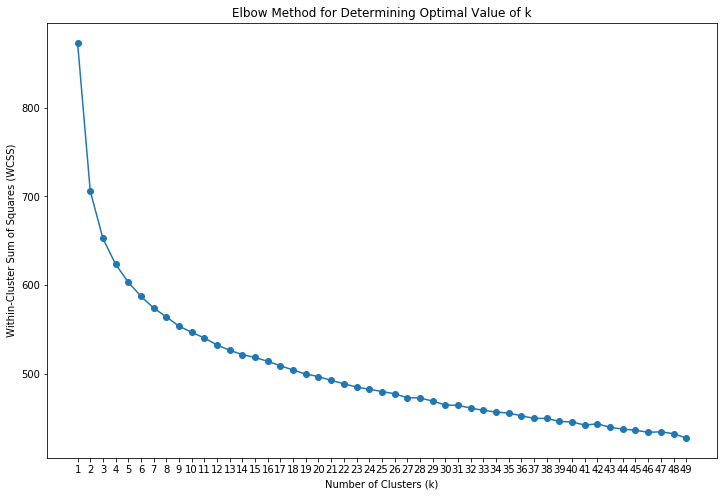

In [9]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors)
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.show()

In [11]:
km = KMeans(n_clusters=14, verbose=0, random_state=42, n_jobs=-1)
km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [13]:
genres['km_cluster'] = km.labels_ + 1

In [21]:
genres.groupby('km_cluster').agg('sum')

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
km_cluster,,,,,,,,,,,,,,,,,,,
1,0,13,6,3,5,24,7,0,24,0,2,11,6,1,5,4,18,5,5
2,0,10,4,4,7,22,6,1,35,4,0,7,4,2,8,7,10,4,2
3,0,13,9,2,9,27,5,1,33,3,1,6,6,5,16,9,19,4,0
4,0,15,12,3,7,25,3,2,29,1,2,3,6,2,15,6,12,2,1
5,0,14,10,2,5,33,3,1,32,0,0,5,2,6,14,5,16,1,1
6,0,14,9,3,8,24,7,0,28,0,3,2,2,6,12,6,13,1,1
7,0,15,9,1,4,20,3,4,30,1,2,2,2,1,14,7,15,5,1
8,0,21,10,1,3,26,8,0,39,1,0,6,4,6,23,8,18,3,3
9,0,10,8,3,8,28,4,1,29,1,1,7,5,3,12,7,18,8,2
